<div style="text-align: center;">
    <h1>Textual <strike>Semantic</strike> Similarity Analysis <br/>between Embeddings Techniques <br/> using Brazilian Legal Data</h1>
<div>

# Introdução

No contexto Legal, a recuperação de decisões anteriores sobre um assunto de interesse é utilizada como precedente e serve como argumentação e como base de decisão sobre uma nova peça jurídica do mesmo assunto.
Devido ao grande número de registros jurídicos, o uso de técnicas computacionais se fazem indispensáveis para a varredura de toda uma base de dados de modo a retornar itens de uma pesquisa em tempo satisfatório.

A busca baseada em palavras chaves é muito utilizada na área de Recuperação da Informação. Entre as técnicas utilizadas na busca por palavras chaves, o <i>Bag of Words</i> e o <i>TF-IDF</i> são as comuns. Essas técnicas geram uma abstração onde o texto tem sua forma simbólica representada numericamente de forma a tornar possível a comparação e cálculo de similaridade com diferentes textos.

Outras técnicas de representações textuais que geram as representações codificando também a semântica envolvida surgiram para diferentes níveis de segmentação textual, como palavras, parágrafos ou textos completos. Com isso, um mesmo texto pode ser representado numericamente de formas diferentes.

# Objetivo
O objetivo deste estudo é analisar as convergências e divergências entre representações textuais geradas por diferentes técnicas de embeddings. Para isso, será analisado quais documentos são recuperados por cada técnica dada um documento de consulta. Feito isso, será realizada uma comparação entre as recuperações entre diferentes representações para uma mesma consulta.

# Dados
Os dados utilizados serão textos de acórdãos do STJ e votos do TCU. Os dados foram recuperados por uma rotina de raspagem de dados dos sites dos respectivos órgãos. A particularidade desses dados consiste em serem <b>precedentes de jurisprudências</b> usadas pelos órgãos. Jurisprudências são entendimentos adotados por órgãos jurídicos que orientam qual deve ser a decisão para um determinado assunto. Esses entendimentos são formulados a partir da análise de decisões anteriores sobre o mesmo assunto, e tem como objetivo uniformizar as decisões e dar celeridade aos processos de assuntos recorrentes.

O total dos dados obtidos com o procedimento de raspagem é o seguinte:

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

def replace_edicao(text):
    s = re.sub("^EDIÇÃO N\. \d+:", "", text).strip()
    s = re.sub(" - M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})$","", s)
    s = re.sub(" M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})$","", s)
    
    return s

stj_data = pd.read_csv('../datasets/jurisprudencias_stj.csv', index_col=0)

#PRÉPROCESSAMENTO para remover textos que não deveriam estar nas colunas
stj_data['PROCESSO'] = stj_data['PROCESSO'].apply(lambda x: re.sub('Processo\n','',x))
stj_data['RELATOR'] = stj_data['RELATOR'].apply(lambda x: re.sub('Relator(a)\n','',x))
stj_data['ORGAO'] = stj_data['ORGAO'].apply(lambda x: re.sub('Órgão Julgador\n','',x))
stj_data['DATA_JULGAMENTO'] = stj_data['DATA_JULGAMENTO'].apply(lambda x: re.sub('Data do Julgamento\n','',x))
stj_data['DATA_PUBLICACAO'] = stj_data['DATA_PUBLICACAO'].apply(lambda x: re.sub('Data da Publicação/Fonte\nDJe','',x))
stj_data['EMENTA'] = stj_data['EMENTA'].apply(lambda x: re.sub('Ementa\n','',x))

stj_data.NATUREZA = stj_data.NATUREZA.map(replace_edicao)

tcu_data = pd.read_csv("../datasets/jurisprudencias_tcu.csv", index_col=0)


Bad key text.latex.preview in file /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably need to 

STJ: 
7407 Acórdãos
1458 Jurisprudências
7 Matérias
68 Naturezas

Histograma precedentes por Jurisprudência: 


<AxesSubplot:>

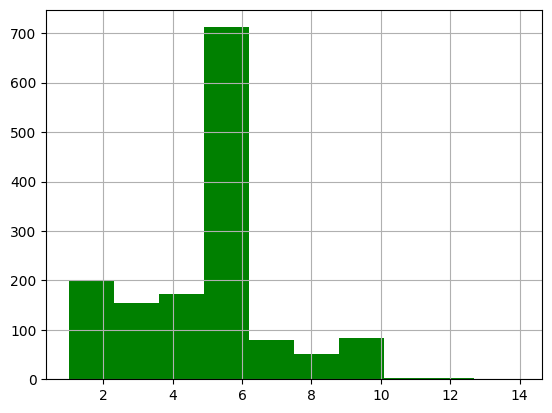

In [2]:
print("STJ: ")
print(len(stj_data), "Acórdãos")
print(len(stj_data.TEMA.unique()), "Jurisprudências")
print(len(stj_data.MATERIA.unique()), "Matérias")
print(len(stj_data.NATUREZA.unique()), "Naturezas\n")
print("Histograma precedentes por Jurisprudência: ")
stj_data.TEMA.value_counts().hist(color='green')

TCU: 
441 Acórdãos
44 Jurisprudências
4 Áreas
27 Temas
38 Subtemas

Histograma precedentes por Jurisprudência: 


<AxesSubplot:>

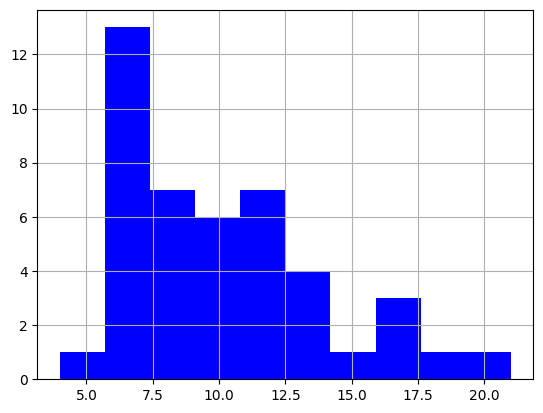

In [3]:
print("TCU: ")
print(len(tcu_data), "Acórdãos")
print(len(tcu_data.ENUNCIADO.unique()), "Jurisprudências")
print(len(tcu_data.AREA.unique()), "Áreas")
print(len(tcu_data.TEMA.unique()), "Temas")
print(len(tcu_data.SUBTEMA.unique()), "Subtemas\n")
print("Histograma precedentes por Jurisprudência: ")
tcu_data.ENUNCIADO.value_counts().hist(color='blue')

No entanto, durante o processo de raspagem alguns registros tiveram colunas nulas, e em alguns casos houve duplicação de registros. Analisando os histogramas abaixo é possível notar um outlier nos dados do TCU, indicado por documento com quantidade de palavras muito superior aos demais documentos.

In [4]:
stj_data = stj_data.dropna().drop_duplicates()
# stj_data = stj_data[stj_data.groupby(['TEMA'])['EMENTA'].transform('count') > 5]
tcu_data = tcu_data.dropna().drop_duplicates()

Text(0.5, 1.0, 'comparing number of words per sentence distribution in TCU data')

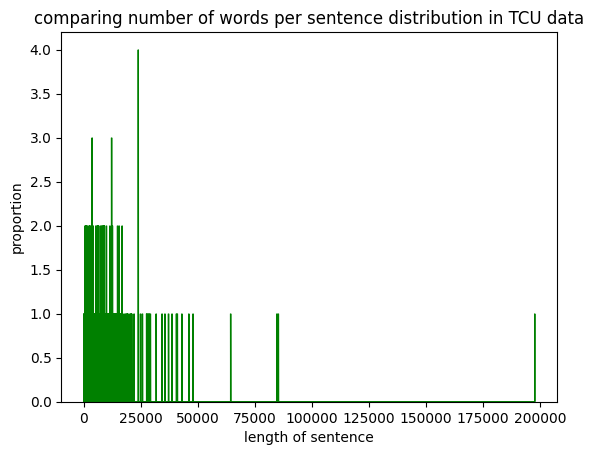

In [5]:
from matplotlib import pyplot as plt

tamanho_votos = [len(doc.split(' ')) for doc in tcu_data.VOTO]

plt.hist(tamanho_votos, bins=range(min(tamanho_votos), max(tamanho_votos) + 1, 1), 
         histtype='step', color="green")
plt.xlabel("length of sentence")
plt.ylabel("proportion")
plt.title("comparing number of words per sentence distribution in TCU data")

In [6]:
outliers = [i for i, d in tcu_data.iterrows() if len(d.VOTO.split(' ')) > 100000]
final_tcu_data = None
for i in outliers:
    final_tcu_data = tcu_data.drop(i)
tcu_data = final_tcu_data

Text(0.5, 1.0, 'comparing number of words per sentence distribution in STJ data')

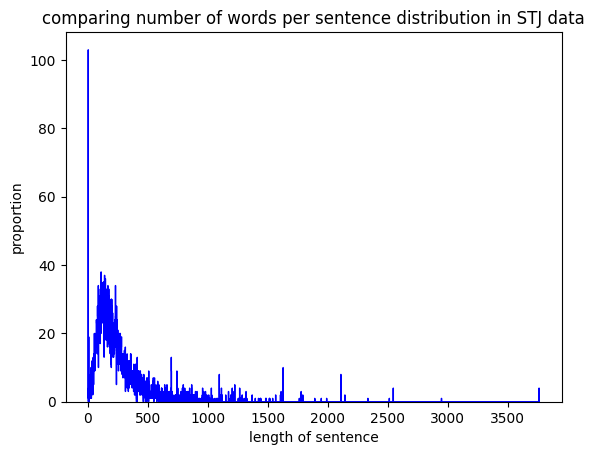

In [7]:
tamanho_acordaos = [len(doc.split(' ')) for doc in stj_data.EMENTA]

plt.hist(tamanho_acordaos, bins=range(min(tamanho_acordaos), max(tamanho_acordaos) + 1, 1), 
         histtype='step', color="blue")
plt.xlabel("length of sentence")
plt.ylabel("proportion")
plt.title("comparing number of words per sentence distribution in STJ data")

STJ: 
7403 Acórdãos
1458 Jurisprudências
7 Matérias
68 Naturezas

Histograma precedentes por Jurisprudência: 


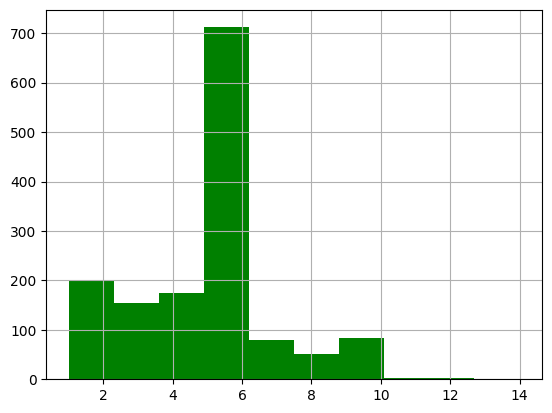

In [8]:
print("STJ: ")
print(len(stj_data), "Acórdãos")
print(len(stj_data.TEMA.unique()), "Jurisprudências")
print(len(stj_data.MATERIA.unique()), "Matérias")
print(len(stj_data.NATUREZA.unique()), "Naturezas\n")
print("Histograma precedentes por Jurisprudência: ")
stj_data.TEMA.value_counts().hist(color='green')
stj_data.to_csv('../datasets/jurisprudencias_stj_final.csv', index=False)

plt.savefig('../results/stj_data_hist.pdf')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Glyph 28 () missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Glyph 29 () missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 28 () missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 29 () missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Glyph 28 () missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Glyph 29 () missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Glyph 28 () missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Glyph 29 () missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launche

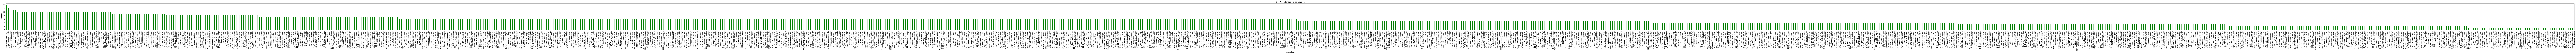

In [9]:
values_counts = [[k[:20]+'...', v] for k,v in stj_data.TEMA.value_counts().iteritems()]
stj_j = [item[0] for item in values_counts]
stj_v = [item[1] for item in values_counts]

fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(stj_j, stj_v, width = 0.3, color='green')
 
plt.xlabel("Jurisprudence")
plt.ylabel("Precedents")
plt.xticks(rotation=90)
plt.title("STJ Precedents x Jurisprudence")

N = len(stj_j)

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

fig.tight_layout()
plt.savefig('../results/stj_juris_pre.pdf', bbox_inches="tight")
plt.show()


TCU: 
371 Acórdãos
44 Jurisprudências
4 Áreas
27 Temas
38 Subtemas

Histograma precedentes por Jurisprudência: 


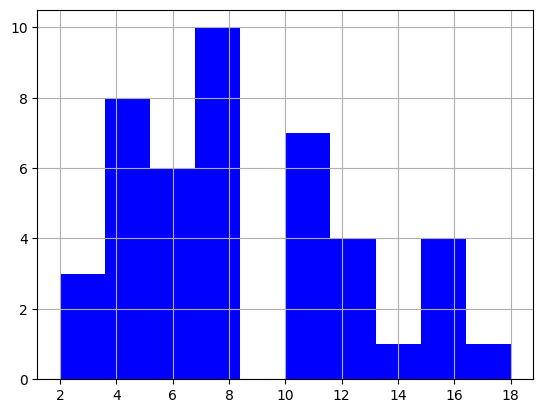

In [10]:
print("TCU: ")
print(len(tcu_data), "Acórdãos")
print(len(tcu_data.ENUNCIADO.unique()), "Jurisprudências")
print(len(tcu_data.AREA.unique()), "Áreas")
print(len(tcu_data.TEMA.unique()), "Temas")
print(len(tcu_data.SUBTEMA.unique()), "Subtemas\n")
print("Histograma precedentes por Jurisprudência: ")
tcu_data.ENUNCIADO.value_counts().hist(color='blue')
tcu_data.to_csv('../datasets/jurisprudencias_tcu_final.csv', index=False)
plt.savefig('../results/tcu_data_hist.pdf')

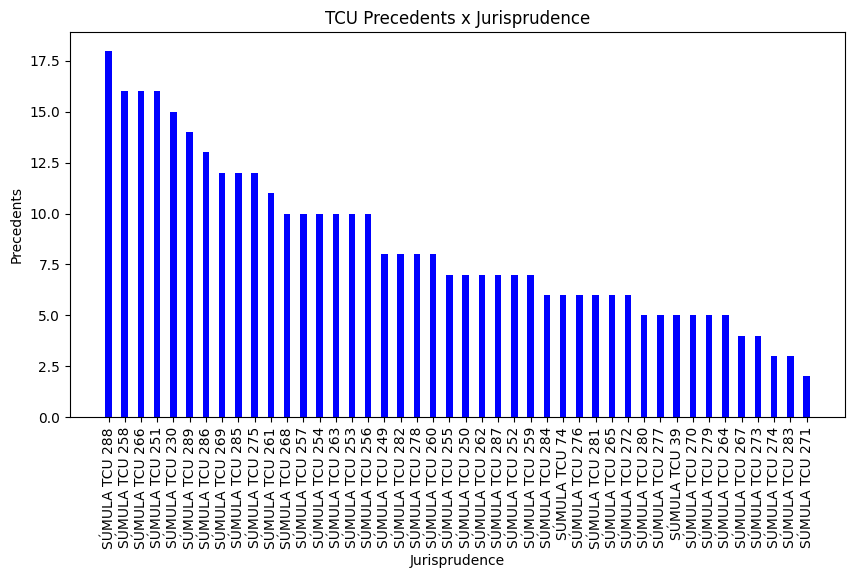

In [11]:
# [ e.split(':')[0] for e in tcu_data.ENUNCIADO]
values_counts = [[k.split(':')[0], v] for k,v in tcu_data.ENUNCIADO.value_counts().iteritems()]
tcu_j = [item[0] for item in values_counts]
tcu_v = [item[1] for item in values_counts]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(tcu_j, tcu_v, width = 0.4, color='blue')
 
plt.xlabel("Jurisprudence")
plt.ylabel("Precedents")
plt.xticks(rotation=90)
plt.title("TCU Precedents x Jurisprudence")
plt.savefig('../results/tcu_juris_pre.pdf', bbox_inches="tight")
plt.show()

## Semantic Textual Similarity Dataset

A partir dos dados de jurisprudências de cada órgão foi gerado um conjunto de dados para a tarefa de STS. A premissa utilizada para a construção do conjunto de dados foi que acórdãos/votos de uma mesma jurisprudência guardam uma grande relação de similaridade. Ainda, metadados como matéria, natureza, ou tema dos textos de cada órgao também permitem inferir diferentes graus de similaridade entre textos distintos. Com isso, o conjunto de dados de STS gerado tem uma anotação fraca, pois os rótulos não foram produzidos por um anotador real, mas baseado em heurísticas provenientes dos metadados disponíveis.

In [12]:
tcu_sts = pd.read_csv("../datasets/tcu_sts.csv").drop_duplicates(
    subset=["sentence_A", "sentence_B"], keep="last"
)
stj_sts = pd.read_csv("../datasets/stj_sts.csv").drop_duplicates(
    subset=["sentence_A", "sentence_B"], keep="last"
)

In [13]:
print("Total de registros do TCU: ", len(tcu_sts))
print("Total de registros do STJ: ", len(stj_sts))

Total de registros do TCU:  4843
Total de registros do STJ:  51437


# Embeddings similarities analysis

Para este estudo foram escolhidas as seguintes técnicas:

<table>
    <thead>
        <tr>
            <th>Model</th>
            <th>Setup</th>
            <th>vector size</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>TF-IDF</td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td>BM25</td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td>word2vec</td>
            <td>mean</td>
            <td>300</td>
        </tr>
        <tr>
            <td>weighted word2vec</td>
            <td>TFIDF weighted + mean</td>
            <td>300</td>
        </tr>
        <tr>
            <td>fasttext</td>
            <td>mean</td>
            <td>300</td>
        </tr>
        <tr>
            <td>weighted fasttext</td>
            <td>TFIDF weighted + mean</td>
            <td>300</td>
        </tr>
        <tr>
            <td>Sentence Transformer</td>
            <td>Distill USE Multilingual</td>
            <td>512</td>
        </tr>
        <tr>
            <td>ELMo</td>
            <td>token embeddings mean</td>
            <td>1024</td>
        </tr>
        <tr>
            <td>BERT</td>
            <td>last 4 layers concat</td>
            <td>3072</td>
        </tr>
        <tr>
            <td>ITD BERT</td>
            <td>LM finetunned on ITD dataset, last 4 layers concat</td>
            <td>3072</td>
        </tr>
        <tr>
            <td>Longformer</td>
            <td>BERT based, last 4 layers concat</td>
            <td>3072</td>
        </tr>
        <tr>
            <td>ITD Longformer</td>
            <td>ITD BERT based, last 4 layers concat</td>
            <td>3072</td>
        </tr>
    </tbody>
</table>

Por que concatenar as ultimas 4 camadas? O paper mostra um F1 melhor quando usando o BERT como feature approach https://arxiv.org/pdf/1810.04805.pdf

## Qualitative Analysis

### Scatter plot with DensMAP Visualization

<b>DensMAP²</b> é uma técnica de redução de dimensionalidade para visualização de dados baseada no <b>UMAP³</b> que também se preocupa em criar espaços vetoriais reduzidos que respeitem de forma estimada a a densidade local das subpopulações dos dados a serem visualizados.


<p style='font-size:10px'>² NARAYAN, Ashwin; BERGER, Bonnie; CHO, Hyunghoon. Density-preserving data visualization unveils dynamic patterns of single-cell transcriptomic variability. bioRxiv, 2020.<p>
<p style='font-size:10px'>³ MCINNES, Leland; HEALY, John; MELVILLE, James. Umap: Uniform manifold approximation and projection for dimension reduction. arXiv preprint arXiv:1802.03426, 2018.<p>

In [14]:
import os
import pickle

import umap
import faiss
from tqdm.notebook import tqdm

def dimensionality_reduction(vectors_sizes, results_path):
    data = {}
    files = os.listdir(results_path)
    for file in files:
        if file.endswith(".faiss"):
            print(file)
            size = vectors_sizes[file.split("/")[-1]]
            indexer = faiss.read_index(results_path + file)
            indexer.nprobe = 100
            points = []
            for i in tqdm(range(indexer.ntotal)):
                vec = indexer.reconstruct(i)
                #se eu usar um sample posso acabar tendo vetores vazios em alguns espaços do index
                result = len([elem for elem in vec if elem != 0])
                if result != 0:
                    points.append(vec)

            points_embeddings = umap.UMAP(densmap=True, random_state=42). \
                                    fit_transform(points)
            data[file.split("/")[-1]] = points_embeddings
    return data

In [15]:
from bokeh.io import output_notebook, show, save
from bokeh.plotting import figure
from bokeh.layouts import gridplot, column, row
from bokeh.models import ColumnDataSource, CustomJS, Select
from bokeh.models.tools import HoverTool
from bokeh.palettes import Turbo256 
from bokeh.io import export_png

import geckodriver_autoinstaller
geckodriver_autoinstaller.install()

from selenium import webdriver
from selenium.webdriver import FirefoxOptions

opts = FirefoxOptions()
opts.add_argument("--headless")
browser = webdriver.Firefox(options=opts)


output_notebook()

def bokeh_save_all_plots(path, variants, map_models, umap_points, juris_data, juris_colors, juris_index, plot_row=3):
    for i, variant in enumerate(variants):    
        all_graphs = []
        current_row = []
        for filename, model_name in map_models.items():
            if variant == "":
                colors = juris_colors
            else:    
                colors = []
                for idx, j in enumerate(juris_data):
                    if j != variant:
                        colors.append("rgba(0, 0, 0, 0.1)")
                    else:
    #                     colors.append(juris_colors[idx])
                        colors.append('orange')

            
            points = umap_points[filename]
            # create a column data source for the plots to share
            source = ColumnDataSource(data=dict(x=points[:, 0], y=points[:, 1],
                                                jurisprudence=juris_data, index=juris_index, 
                                                color=colors))

            plot_options = dict(width=500, plot_height=500)

            # create a new plot and add a renderer
            fig = figure(**plot_options)
            fig.circle('x', 'y', source=source, fill_color='color',line_color="white")
            fig.title.text = model_name
            fig.title.align = "center"
            fig.title.text_font_size = "20px"
            
            if len(current_row) / plot_row == 1:
                all_graphs.append(current_row)
                current_row = []
            
            current_row.append(fig)
        
        if len(current_row) > 0:
            current_row = [None] + current_row
            all_graphs.append(current_row)
        p = gridplot(all_graphs,toolbar_options=dict(logo=None), toolbar_location=None)
        export_png(p, filename=path+"variant_"+str(i+1)+".png", webdriver=browser)

Loading BokehJS ...

In [16]:
def bokeh_show_all_plots(path_to_html, variants, map_models, umap_points, juris_data, juris_colors, juris_index, plot_row=3):
    dict_source = {}
    for filename, model_name in map_models.items():
        points = umap_points[filename]
        dict_source[model_name+'_x'] = points[:, 0]
        dict_source[model_name+'_y'] = points[:, 1]
    dict_source['jurisprudence'] = juris_data
    dict_source['index'] = juris_index
    dict_source['color'] = juris_colors[:]
    dict_source['original_colors'] = juris_colors[:]
    source = ColumnDataSource(data=dict_source)
    TOOLS = "box_select,lasso_select,wheel_zoom,pan,save"
    plot_options = dict(width=500, plot_height=500, tools=TOOLS, tooltips="INDEX: @index \n JURISPRUDENCE: @jurisprudence")

    all_graphs = []
    current_row = []
    first = None
    for filename, model_name in map_models.items():

        if first == None:
        # create a new plot and add a renderer
            fig = figure(**plot_options)
            first = fig
        else:
            fig = figure(x_range=first.x_range, y_range=first.y_range, **plot_options)

        fig.circle(model_name+'_x', model_name+'_y', source=source, fill_color='color',line_color="white")
        fig.title.text = model_name
        fig.title.align = "center"
        fig.title.text_font_size = "20px"

        if len(current_row) / plot_row == 1:
            all_graphs.append(current_row)
            current_row = []

        current_row.append(fig)

    if len(current_row) > 0:
        all_graphs.append(current_row)
    
    p = gridplot(all_graphs)
    callback = CustomJS(args=dict(source=source), code="""
            var data = source.data;
            var selected = cb_obj.value;
            for (var i = 0; i < data.color.length; i++) {
                    data.color[i] = data.original_colors[i]
            }
            if(selected != 'TODOS'){
                for (var i = 0; i < data.jurisprudence.length; i++) {
                    if(data.jurisprudence[i] != selected){
                        data.color[i] = "rgba(0, 0, 0, 0.1)"
                        //debugger
                    }
                }
            }
            source.change.emit();
        """)

    select = Select(title="Colorir:", value="foo", 
                    options=['TODOS'] + sorted(list(set(juris_data.tolist()))))
    select.js_on_change("value", callback)
    layout = column(select, p)
    show(layout)
    save(layout, path_to_html)

In [17]:
# from bokeh.io import output_notebook, show
# from bokeh.plotting import figure
# from bokeh.layouts import gridplot, column
# from bokeh.models import ColumnDataSource, CustomJS, Select
# from bokeh.models.tools import HoverTool
# from bokeh.palettes import Turbo256 

# output_notebook()

# def bokeh_plots(umap_points, paired_graphs, juris_data, juris_colors, juris_index):
#     for pair in paired_graphs:
#         # create a column data source for the plots to share
#         source = ColumnDataSource(data=dict(x0=umap_points[pair['k1']][:, 0],x1=umap_points[pair['k2']][:, 0], 
#                                             y0=umap_points[pair['k1']][:, 1], y1=umap_points[pair['k2']][:, 1],
#                                             jurisprudence=juris_data,index=juris_index, color=juris_colors[:], original_colors=juris_colors[:]))

#         TOOLS = "box_select,lasso_select,wheel_zoom,pan,save"

#         plot_options = dict(width=500, plot_height=500, tools=TOOLS, tooltips="INDEX: @index \n JURISPRUDENCE: @jurisprudence")


#         # create a new plot and add a renderer
#         left = figure(**plot_options)
#         left.circle('x0', 'y0', source=source, fill_color='color',line_color="white")
#         left.title.text = pair['l1']
#         left.title.align = "center"
#         left.title.text_font_size = "20px"

#         # left.title.text_color = "orange"
#         # left.title.background_fill_color = "#aaaaee"

#         # create another new plot and add a renderer
#         right = figure(x_range=left.x_range, y_range=left.y_range, **plot_options)
#         right.circle('x1', 'y1', source=source, fill_color='color',line_color="white")
#         right.title.text = pair['l2']
#         right.title.align = "center"
#         right.title.text_font_size = "20px"

#         p = gridplot([[left, right]])

#         callback = CustomJS(args=dict(source=source), code="""
#             var data = source.data;
#             var selected = cb_obj.value;
#             for (var i = 0; i < data.color.length; i++) {
#                     data.color[i] = data.original_colors[i]
#             }
#             if(selected != 'TODOS'){
#                 for (var i = 0; i < data.x0.length; i++) {
#                     if(data.jurisprudence[i] != selected){
#                         data.color[i] = "gray"
#                         //debugger
#                     }
#                 }
#             }
#             source.change.emit();
#         """)

#         select = Select(title="Colorir:", value="foo", options=['TODOS'] + sorted(list(set(juris_data.tolist()))))
#         select.js_on_change("value", callback)
#         layout = column(select, p)
#         show(layout)
#     #     show(p)

# bokeh_plots(tcu_umap_points, tcu_graphs, tcu_data.ENUNCIADO, tcu_juris_colors, tcu_data.index)
# tcu_graphs = [  {'k1': 'bert.faiss', 'l1': 'BERT', 'k2': 'tfidf.faiss', 'l2': 'TFIDF'},
#                 {'k1': 'tfidf.faiss', 'l1': 'TFIDF', 'k2': 'lda.faiss', 'l2': 'LDA'},
#                 {'k1': 'fasttext.faiss', 'l1': 'fastText', 'k2': 'word2vec.faiss', 'l2': 'word2vec'},
#                 {'k1': 'bert.faiss', 'l1': 'BERT', 'k2': 'fasttext.faiss', 'l2': 'fastText'},
#                 {'k1': 'word2vec.faiss', 'l1': 'word2vec', 'k2': 'weighted_word2vec.faiss', 'l2': 'weighted word2vec'},
#                 {'k1': 'fasttext.faiss', 'l1': 'fastText', 'k2': 'weighted_fasttext.faiss', 'l2': 'weighted fastText'},
#                 {'k1': 'word2vec.faiss', 'l1': 'word2vec', 'k2': 'doc2vec.faiss', 'l2': 'doc2vec'},
#                 {'k1': 'bert.faiss', 'l1': 'BERT', 'k2': 'elmo.faiss', 'l2': 'ELMo'},
#                 {'k1': 'bert.faiss', 'l1': 'BERT', 'k2': 'sentence_transformer.faiss', 'l2': 'SBERT'},  
#                 {'k1': 'bert.faiss', 'l1': 'BERT', 'k2': 'longformer.faiss', 'l2': 'Longformer'},
#                 {'k1': 'bert.faiss', 'l1': 'BERT', 'k2': 'itd_bert.faiss', 'l2': 'ITD BERT'},
#                 {'k1': 'longformer.faiss', 'l1': 'Longformer', 'k2': 'itd_longformer.faiss', 'l2': 'ITD Longformer'},
#              ]


# stj_graphs = [  {'k1': 'bert.faiss', 'l1': 'BERT', 'k2': 'tfidf.faiss', 'l2': 'TFIDF'},
#                 {'k1': 'tfidf.faiss', 'l1': 'TFIDF', 'k2': 'lda.faiss', 'l2': 'LDA'},
#                 {'k1': 'fasttext.faiss', 'l1': 'fastText', 'k2': 'word2vec.faiss', 'l2': 'word2vec'},
#                 {'k1': 'bert.faiss', 'l1': 'BERT', 'k2': 'fasttext.faiss', 'l2': 'fastText'},
#                 {'k1': 'word2vec.faiss', 'l1': 'word2vec', 'k2': 'weighted_word2vec.faiss', 'l2': 'weighted word2vec'},
#                 {'k1': 'fasttext.faiss', 'l1': 'fastText', 'k2': 'weighted_fasttext.faiss', 'l2': 'weighted fastText'},
#                 {'k1': 'word2vec.faiss', 'l1': 'word2vec', 'k2': 'doc2vec.faiss', 'l2': 'doc2vec'},
#                 {'k1': 'bert.faiss', 'l1': 'BERT', 'k2': 'elmo.faiss', 'l2': 'ELMo'},
#                 {'k1': 'bert.faiss', 'l1': 'BERT', 'k2': 'sentence_transformer.faiss', 'l2': 'SBERT'},  
#                 {'k1': 'bert.faiss', 'l1': 'BERT', 'k2': 'longformer.faiss', 'l2': 'Longformer'},
#                 {'k1': 'bert.faiss', 'l1': 'BERT', 'k2': 'itd_bert.faiss', 'l2': 'ITD BERT'},
#                 {'k1': 'longformer.faiss', 'l1': 'Longformer', 'k2': 'itd_longformer.faiss', 'l2': 'ITD Longformer'},
#              ]

# bokeh_plots(stj_umap_points, stj_graphs, stj_data.TEMA, stj_juris_colors, stj_data.index)

## TCU data projections

In [18]:
tcu_vectors_size = {
    "tfidf.faiss": 34081,
    "bert.faiss": 3072,
    "bertikal.faiss": 3072,
    "elmo.faiss": 1024,
    "word2vec.faiss": 300,
    "weighted_word2vec.faiss": 300,
    "fasttext.faiss": 300,
    "weighted_fasttext.faiss": 300,
    "itd_bert.faiss": 3072,
    "longformer.faiss": 3072,
    "itd_longformer.faiss": 3072,
    "sentence_transformer.faiss": 768,
    "doc2vec.faiss":100,
    "lda.faiss": 44,
    "sim_cse.faiss": 768,
    "diff_cse.faiss": 768,
}
tcu_results_path = "../results/faiss/tcu/"

try:
    tcu_umap_points = pickle.load(open(tcu_results_path+'umap_points.pkl', 'rb')) 
except:
    tcu_umap_points = dimensionality_reduction(tcu_vectors_size, tcu_results_path)    
    pickle.dump(tcu_umap_points, open(tcu_results_path+'umap_points.pkl', 'wb')) # converts array to binary and writes to output

In [19]:
tcu_data = pd.read_csv('../datasets/jurisprudencias_tcu_final_preprocessado.csv', index_col=0)
tcu_juris_enc = tcu_data.ENUNCIADO.astype('category').cat.codes.tolist()
tcu_juris_colors = [Turbo256[i*5] for i in tcu_juris_enc]

map_models = {
    'tfidf.faiss': 'TFIDF',
    'lda.faiss':'LDA',
    'word2vec.faiss': 'word2vec',
    'weighted_word2vec.faiss': 'weighted word2vec',
    'fasttext.faiss': 'fastText',
    'weighted_fasttext.faiss': 'weighted fasttext',
    'doc2vec.faiss': 'doc2vec',
    'elmo.faiss': 'ELMo',
    'bert.faiss' : 'BERT',
    'bertikal.faiss' : 'BERTikal',
    'itd_bert.faiss' : 'ITD BERT',
    'sentence_transformer.faiss':'SBERT',
    'longformer.faiss' : 'Longformer',
    'itd_longformer.faiss' : 'ITD Longformer',
    'sim_cse.faiss' : 'SimCSE',
    'diff_cse.faiss' : 'DiffCSE',
}

tcu_variants = ["",
                "SÚMULA TCU 288: O julgamento pela irregularidade de contas ordinárias ou extraordinárias prescinde de nova audiência ou citação em face de irregularidades pelas quais o responsável já tenha sido ouvido em outro processo no qual lhe tenha sido aplicada multa ou imputado débito.",
               "SÚMULA TCU 263: Para a comprovação da capacidade técnico-operacional das licitantes, e desde que limitada, simultaneamente, às parcelas de maior relevância e valor significativo do objeto a ser contratado, é legal a exigência de comprovação da execução de quantitativos mínimos em obras ou serviços com características semelhantes, devendo essa exigência guardar proporção com a dimensão e a complexidade do objeto a ser executado.",
               "SÚMULA TCU 271: A pensão concedida a beneficiário na condição de inválido tem como requisito essencial laudo pericial emitido por junta médica oficial que ateste a invalidez e sua preexistência ao momento do óbito do instituidor."]
    
bokeh_save_all_plots('../results/faiss/tcu/', tcu_variants, map_models, tcu_umap_points, tcu_data.ENUNCIADO, tcu_juris_colors, tcu_data.index)
bokeh_show_all_plots('../results/faiss/tcu/dynamic.html', tcu_variants, map_models, tcu_umap_points, tcu_data.ENUNCIADO, tcu_juris_colors, tcu_data.index, 2)


/opt/conda/lib/python3.7/site-packages/bokeh/io/saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/opt/conda/lib/python3.7/site-packages/bokeh/io/saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


## STJ data projections

In [20]:
stj_vectors_size = {
    "tfidf.faiss": 25696,
    "bert.faiss": 3072,
    "bertikal.faiss": 3072,
    "elmo.faiss": 1024,
    "word2vec.faiss": 300,
    "weighted_word2vec.faiss": 300,
    "fasttext.faiss": 300,
    "weighted_fasttext.faiss": 300,
    "itd_bert.faiss": 3072,
    "longformer.faiss": 3072,
    "itd_longformer.faiss": 3072,
    "sentence_transformer.faiss": 768,
    "doc2vec.faiss":100,
    "lda.faiss": 1458,
    "sim_cse.faiss": 768,
    "diff_cse.faiss": 768,
}

stj_results_path = "../results/faiss/stj/"

try:
    stj_umap_points = pickle.load(open(stj_results_path+'umap_points.pkl', 'rb')) 
except:
    stj_umap_points = dimensionality_reduction(stj_vectors_size, stj_results_path)
    pickle.dump(stj_umap_points, open(stj_results_path+'umap_points.pkl', 'wb'))

In [21]:
from itertools import cycle

stj_data = pd.read_csv('../datasets/jurisprudencias_stj_final_preprocessado.csv', index_col=0)
stj_juris_enc = stj_data.TEMA.astype('category').cat.codes.tolist()
colors = cycle(Turbo256)
stj_juris_colors = [next(colors) for i in stj_juris_enc]

stj_variants = ["",
                "2) O simples atraso no pagamento de prestação do prêmio do seguro não importa em desfazimento automático do contrato, sendo necessária, ao menos, a prévia constituição em mora do contratante pela seguradora, mediante interpelação.",
               "16) O Estatuto da Criança e do Adolescente não estipulou um número mínimo de atos infracionais graves para justificar a internação com base na reiteração (art. 122, II, do ECA), não havendo que se falar, portanto, no número mínimo de três atos infracionais.",
               "9) O banco não é responsável por fraude em compra on-line paga via boleto de produto não recebido, uma vez que a instituição financeira não pertence à cadeia de fornecimento nem apresentou falha em sua prestação de serviço."]

bokeh_save_all_plots('../results/faiss/stj/', stj_variants, map_models, stj_umap_points, stj_data.TEMA, stj_juris_colors, stj_data.index)
bokeh_show_all_plots('../results/faiss/stj/dynamic.html', stj_variants, map_models, stj_umap_points, stj_data.TEMA, stj_juris_colors, stj_data.index, 2)


# Quantitative Analysis

Para uma análise quantitativa foi realizado um experimento que consistiu em:
1) Gerar embedding para cada documento de cada conjunto de dados com cada uma das técnicas citadas
2) Recuperar os 5 documentos mais similares de cada documento do conjunto de dados com o auxílio do indexador Annoy e calcular a distância de cossenos entre as representações, exceto no caso do BM25 que tem uma dinâmica própria.
3) Salvar cada par de documentos similares de cada técnica em um arquivo CSV

O objetivo a partir daí é verificar as interseções dos pares de documentos similares gerados pelas diferentes técnicas. Para auxiliar na análise vamos usar a visualização <b>UpSet plots¹</b>.

A primeira análise será realizada a partir dos dados do TCU.

<p style='font-size:10px'>¹ Alexander Lex, Nils Gehlenborg, Hendrik Strobelt, Romain Vuillemot, Hanspeter Pfister, UpSet: Visualization of Intersecting Sets, IEEE Transactions on Visualization and Computer Graphics (InfoVis ‘14), vol. 20, no. 12, pp. 1983–1992, 2014. doi: doi.org/10.1109/TVCG.2014.2346248</p>


In [22]:
from matplotlib import pyplot
from upsetplot import from_contents, plot

# PASSO 2
def filter_five_most_similar():
    for name in tqdm(['tcu','stj']):
        data = pd.read_csv('../results/'+name+'/similarities.csv')
        bm25 = data[data.MODEL_NAME == 'bm25'].reset_index(drop=True)
        bm25.rename(columns={"COSINE_SIMILARITY": "SIMILARITY"}, inplace=True)
        faiss_data = pd.read_csv('../results/faiss/'+name+'/similarities.csv', index_col=0)
        concat = pd.concat([faiss_data,bm25])

        tmp = []
        for model_name, model_group in tqdm(concat.groupby('MODEL_NAME')):
            for source_name, source_group in model_group.groupby('SOURCE_INDEX'):
                offset = 0
                if len(source_group) > 5:
                    offset = 1
                arr = source_group.sort_values(by=['SIMILARITY'])[offset:].values.tolist()
                tmp = tmp + arr

        df = pd.DataFrame(tmp, columns=concat.columns.values.tolist())
        df.to_csv('../results/faiss/'+name+'/similarities_final.csv', index=False)

# PASSO 3
def generate_upset_plots(similarities, save_path):
    models_dict = {}
    for model_name, model_pairs in similarities.groupby("MODEL_NAME"):
        # if model_name in ['sim_cse','diff_cse']:
        #     continue
        pairs = []
        for i, pair in model_pairs.iterrows():
            pairs.append((pair[0], pair[1]))
        models_dict[model_name] = set(pairs)

    example = from_contents(models_dict)
    plot(example, show_percentages=True,min_subset_size="0.4%",sort_by='cardinality')
    # orientation='vertical'
    pyplot.savefig(save_path)
    pyplot.show()

# filter_five_most_similar()

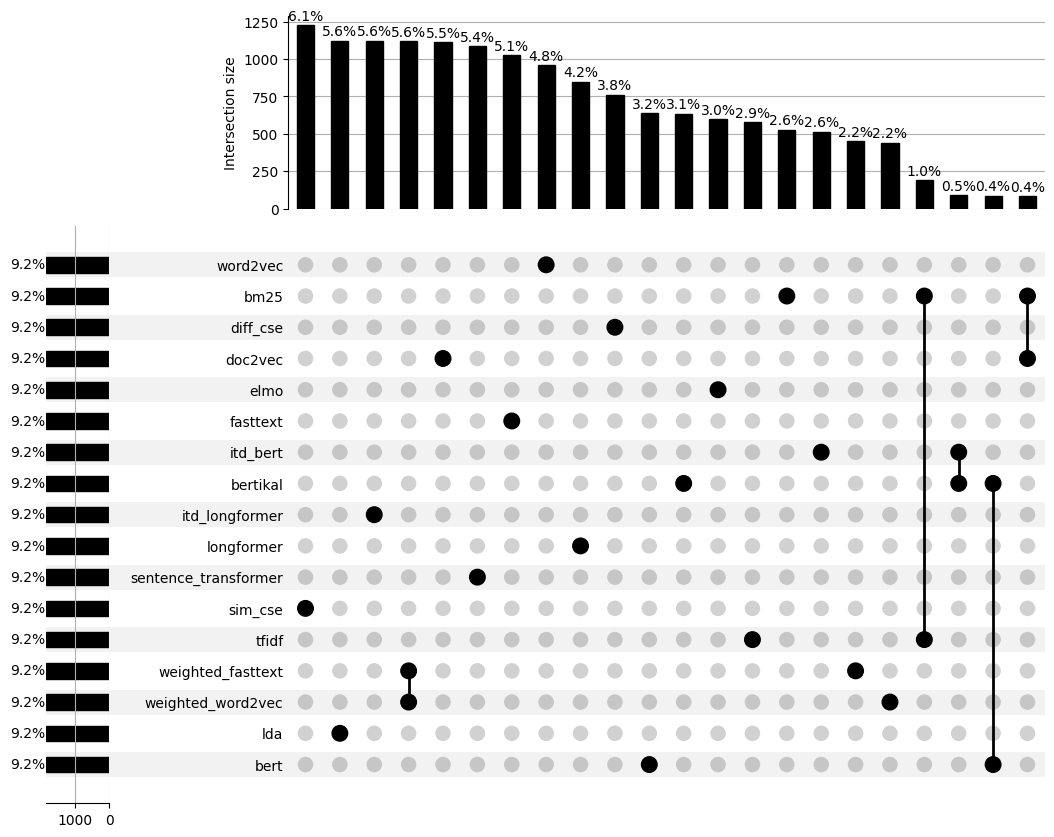

In [23]:
tcu_similarities = pd.read_csv("../results/faiss/tcu/similarities_final.csv")
generate_upset_plots(tcu_similarities, "../results/faiss/tcu/similarities.jpg")

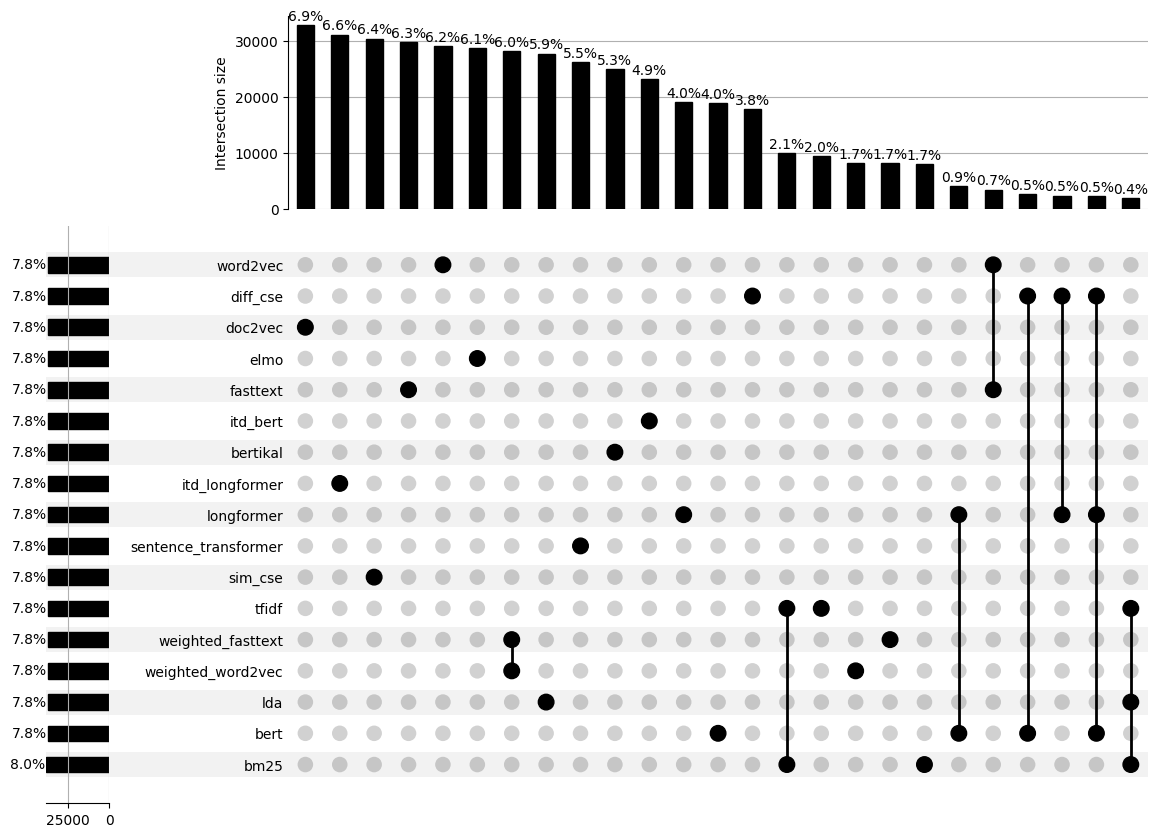

In [24]:
stj_similarities = pd.read_csv("../results/faiss/stj/similarities_final.csv")
generate_upset_plots(stj_similarities, "../results/faiss/stj/similarities.jpg")

# How each embedding technique performs compared to STS dataset

In [25]:
import numpy as np
import matplotlib.pyplot as plt

SOURCE_INDEX = 0
SIMILAR_INDEX = 1

def sts_neighbors_intercept(similarities, data, column, sts_data):
    sts_similarities = {}
    data[column] = data[column].str.lower()
    sts_data['sentence_A'] = sts_data['sentence_A'].str.lower()
    sts_data['sentence_B'] = sts_data['sentence_B'].str.lower()
    for model, s_data in similarities.groupby("MODEL_NAME"):
        if model == 'sentence_transformer':
            model = 'sbert'
        pairs_score = []
        for i, row in tqdm(s_data.iterrows()):
            sentence_A = data.iloc[row[SOURCE_INDEX]][column]
            sentence_B = data.iloc[row[SIMILAR_INDEX]][column]

            pair = sts_data[
                ((sts_data.sentence_A == sentence_A) & (sts_data.sentence_B == sentence_B))
                | ((sts_data.sentence_B == sentence_A) & (sts_data.sentence_A == sentence_B))
            ]
            if len(pair) > 0:
                pairs_score.append(pair.iloc[0].score)

        sts_similarities[model] = pairs_score

    scores_stats = []
    for model, scores in sts_similarities.items():
        sts_similars = similarities[similarities.MODEL_NAME == ('sentence_transformer' if model == 'sbert' else model)]
        similars = [x for x in sts_similarities[model]]
        perc_similar = len(similars)/float(len(sts_similars)) * 100
        scores_stats.append([model, perc_similar, np.mean(similars), np.std(similars)])
        
    return sts_similarities, scores_stats

In [26]:
def generate_sts_neighbors_intercept_graph(sts_similarities, scores_stats, save_path):
    df = pd.DataFrame(scores_stats, columns=["MODEL", "SIMILARS_PERCENTUAL", "MEAN_SIMILARITY", "STANDARD_DEVIATION"])
    fig = pyplot.figure()  # Create matplotlib figure

    ax = fig.add_subplot(111)  # Create matplotlib axes
    ax2 = ax.twinx()  # Create another axes that shares the same x-axis as ax.

    width = 0.4
    df_sorted = df.sort_values(by=['SIMILARS_PERCENTUAL'],ascending=False)
    df_sorted.SIMILARS_PERCENTUAL.plot(kind="bar", color="red", ax=ax, width=width, position=1)
#     df_sorted.MEAN_SIMILARITY.plot(kind="bar", ax=ax2, width=width, position=0, yerr='')
    df_sorted.plot(kind="bar", y='MEAN_SIMILARITY', yerr='STANDARD_DEVIATION', ax=ax2, width=width, position=0)

    ax.set_ylabel("Percentage")
    ax2.set_ylabel("Mean Similarity")

    ax.set_xticklabels(df_sorted.MODEL)
    ax.legend(["Percentage retrieved pairs present in STS dataset"],
              loc='upper center', bbox_to_anchor=(0.5, 1.12),frameon=False)
    ax2.legend(["Mean similarity from retrieved pairs present in STS dataset"],
               loc='upper center', bbox_to_anchor=(0.5, 1.2),frameon=False)
    
#     fig.tight_layout()
    plt.savefig(save_path, bbox_inches="tight")
    plt.show()

### TCU data

In [27]:
tcu_sts_similarities_file = '../results/faiss/tcu/sts_similarities.pkl'
tcu_score_stats_file = '../results/faiss/tcu/score_stats.pkl'
try:
    tcu_sts_similarities = pickle.load(open(tcu_sts_similarities_file, 'rb')) 
    tcu_score_stats = pickle.load(open(tcu_score_stats_file, 'rb'))
except:
    tcu_sts_similarities, tcu_score_stats = sts_neighbors_intercept(tcu_similarities, tcu_data, 'VOTO', tcu_sts)
    pickle.dump(tcu_sts_similarities, open(tcu_sts_similarities_file, 'wb')) # converts array to binary and writes to output
    pickle.dump(tcu_score_stats, open(tcu_score_stats_file, 'wb')) # converts array to binary and writes to output

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

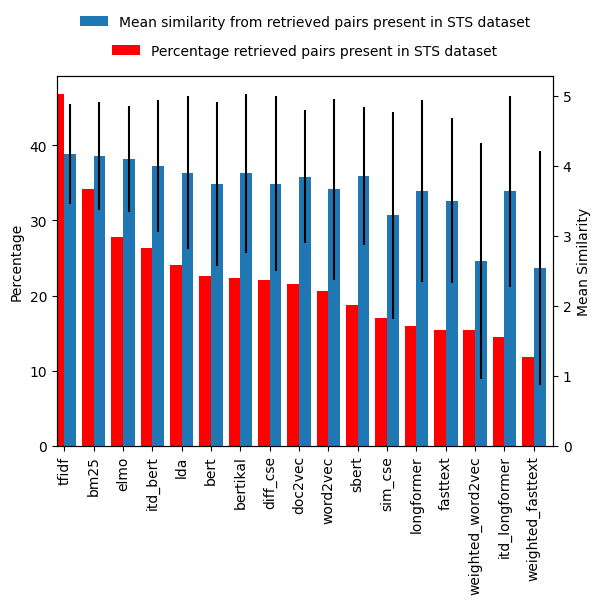

In [28]:
generate_sts_neighbors_intercept_graph(tcu_sts_similarities, tcu_score_stats, '../results/faiss/tcu/retrieved_sts.pdf')

### STJ Data

In [29]:
import pickle

stj_sts_similarities_file = '../results/faiss/stj/sts_similarities.pkl'
stj_score_stats_file = '../results/faiss/stj/score_stats.pkl'
try:
    stj_sts_similarities = pickle.load(open(stj_sts_similarities_file, 'rb')) 
    stj_score_stats = pickle.load(open(stj_score_stats_file, 'rb'))
except:
    stj_sts_similarities, stj_score_stats = sts_neighbors_intercept(stj_similarities, stj_data,'EMENTA', stj_sts)
    pickle.dump(stj_sts_similarities, open(stj_sts_similarities_file, 'wb')) # converts array to binary and writes to output
    pickle.dump(stj_score_stats, open(stj_score_stats_file, 'wb')) # converts array to binary and writes to output

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

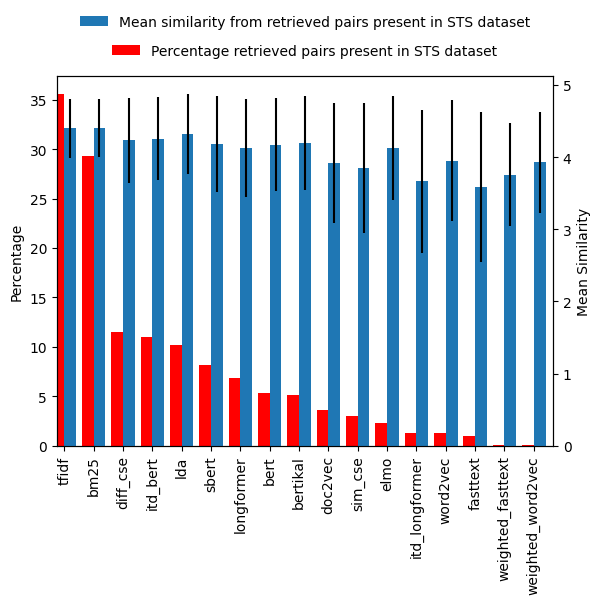

In [30]:
generate_sts_neighbors_intercept_graph(stj_sts_similarities, stj_score_stats, '../results/faiss/stj/retrieved_sts.pdf')

In [31]:
stj_score_stats

[['bert', 5.751722274753479, 4.183857170584285, 0.6410046725999068],
 ['bertikal', 5.076320410644334, 4.196503923380341, 0.6478525227486722],
 ['bm25', 29.29946232369672, 4.399311523566428, 0.4036242014633774],
 ['doc2vec', 3.8876131298122383, 3.951679037695132, 0.8096268562396538],
 ['elmo', 2.5097933270295827, 4.1164350154127956, 0.744167140212967],
 ['fasttext', 1.0968526273132515, 3.675138061142917, 1.0280896961132218],
 ['itd_bert', 11.4845332973119, 4.259444210413443, 0.5756918366828386],
 ['itd_longformer', 1.3508037282182899, 3.745973199702559, 0.9745872776702512],
 ['lda', 10.193164933135215, 4.32121995290615, 0.5585992578142246],
 ['longformer', 7.075509928407403, 4.129285430569552, 0.6757972291371209],
 ['sbert', 8.229096312305822, 4.18327751032725, 0.6601205998787435],
 ['tfidf', 35.6206943131163, 4.398537228126116, 0.4038280495852293],
 ['weighted_fasttext',
  0.09995947588815346,
  3.809638527359405,
  0.7249218717667508],
 ['weighted_word2vec',
  0.10536269080102661,
  3

### Ponto 1:

- Calcular os mais similares de cada documento numa representação para documentos de outra representação (p.ex.: BERT -> Longformer) e analisar com o conjunto de similares calculados dentro de uma mesma representação.
    - Verificar médias e variâncias

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot
from upsetplot import from_contents, plot

lists_intersection = lambda l1, l2: [list(x) for x in set(tuple(x) for x in l1).intersection(set(tuple(x) for x in l2))]

# indexer = faiss.read_index('../results/faiss/'+data_name+'/'+model_name+'.faiss')

def from_one_to_another_space_similarities(source_faiss, source_title, target_faiss, target_title, nns_in_source, dataname):
    
    try:
        to_another_df = pd.read_csv("../results/faiss/"+dataname+"/"+source_title.lower()+'_'+target_title.lower()+".csv")
        intersection = pd.read_csv("../results/faiss/"+dataname+"/intersection_"+source_title.lower()+'_'+target_title.lower()+".csv")
    except:
        print('Erro ao carregar... Recalculando...')
        to_another = []

        for i in range(source_faiss.ntotal):
            source_vector = source_faiss.reconstruct(i)
            #se eu usar um sample posso acabar tendo vetores vazios em alguns espaços do index
            result = len([elem for elem in source_vector if elem != 0])
            if result != 0:
                D, I = target_faiss.search(np.array([source_vector]).astype('float32'), 6)
                nns = I[0]
                for similar_index in nns[1:]:
                    similar_vector = source_faiss.reconstruct(int(similar_index))
                    similarity = cosine_similarity([source_vector], [similar_vector])[0][0]
                    to_another.append([i, similar_index, similarity, source_title])

        to_another_df = pd.DataFrame(to_another, 
                                columns=['SOURCE_INDEX','SIMILAR_INDEX','COSINE_SIMILARITY','MODEL_NAME'])
        to_another_df.to_csv("../results/faiss/"+dataname+"/"+source_title.lower()+'_'+target_title.lower()+".csv",index=False)
        intersection = pd.merge(to_another_df, nns_in_source, how='inner', on=['SIMILAR_INDEX','SOURCE_INDEX'])
        intersection.to_csv("../results/faiss/"+dataname+"/intersection_"+source_title.lower()+'_'+target_title.lower()+".csv",index=False)

    print('Total de pares de vizinhos: ', len(nns_in_source))
    print('Tamanho da interseção de vizinhos entre diferentes representações:', len(intersection))
    print('Média da Similaridade de Cosseno entre os pares de vizinhos da interseção: ', np.mean(intersection.COSINE_SIMILARITY))
    print('Desvio Padrão da Similaridade de Cosseno entre os pares de vizinhos da interseção: ', np.std(intersection.COSINE_SIMILARITY))

    pairs = []
    spaces_comparision = {}
    for i, pair in to_another_df.iterrows():
        pairs.append((pair[0], pair[1]))
    spaces_comparision[source_title+'->'+target_title] = set(pairs)

    pairs = []
    for i, pair in nns_in_source.iterrows():
        pairs.append((pair[0], pair[1]))
    spaces_comparision[source_title+'->'+source_title] = set(pairs)

    example = from_contents(spaces_comparision)
    plot(example, show_percentages=True, orientation='vertical')
    pyplot.savefig("../results/faiss/"+dataname+"/intersection_"+source_title.lower()+'_'+target_title.lower())
    pyplot.show()
    print()
    


In [33]:
def from_one_to_another_space_similarities_analysis(similarities, dataname):
    bert_faiss = faiss.read_index("../results/faiss/"+dataname+"/bert.faiss")
    itd_bert_faiss = faiss.read_index("../results/faiss/"+dataname+"/itd_bert.faiss")
    long_faiss = faiss.read_index("../results/faiss/"+dataname+"/longformer.faiss")
    itd_long_faiss = faiss.read_index("../results/faiss/"+dataname+"/itd_longformer.faiss")

    in_same_bert = similarities[similarities.MODEL_NAME == 'bert']
    in_same_itd_bert = similarities[similarities.MODEL_NAME == 'itd_bert']
    in_same_longformer = similarities[similarities.MODEL_NAME == 'longformer']
    in_same_itd_longformer = similarities[similarities.MODEL_NAME == 'itd_longformer']

    print('BERT -> LONGFORMER')
    from_one_to_another_space_similarities(bert_faiss, 'BERT', long_faiss,'Longformer', in_same_bert, dataname)

    print('LONGFORMER -> BERT')
    from_one_to_another_space_similarities(long_faiss, 'Longformer', bert_faiss,'BERT', in_same_longformer, dataname)

    print('BERT -> ITD_BERT')
    from_one_to_another_space_similarities(bert_faiss,'BERT', itd_bert_faiss, 'ITD BERT', in_same_bert, dataname)
    
    print('ITD_BERT -> BERT')
    from_one_to_another_space_similarities(itd_bert_faiss,'ITD BERT', bert_faiss, 'BERT', in_same_itd_bert, dataname)

    print('LONGFORMER -> ITD_LONGFORMER')
    from_one_to_another_space_similarities(long_faiss, 'Longformer', itd_long_faiss,'ITD Longformer', in_same_longformer, dataname)

    print('ITD_LONGFORMER -> LONGFORMER')
    from_one_to_another_space_similarities(itd_long_faiss,'ITD Longformer', long_faiss, 'Longformer',in_same_itd_longformer, dataname)

### TCU data

BERT -> LONGFORMER
Erro ao carregar... Recalculando...
Total de pares de vizinhos:  1855
Tamanho da interseção de vizinhos entre diferentes representações: 351
Média da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.9889900648695791
Desvio Padrão da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.0083447904101606


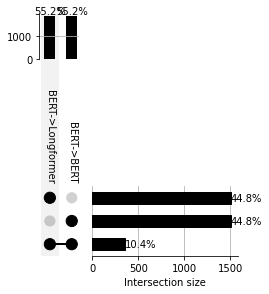


LONGFORMER -> BERT
Erro ao carregar... Recalculando...
Total de pares de vizinhos:  1855
Tamanho da interseção de vizinhos entre diferentes representações: 295
Média da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.9754003260095241
Desvio Padrão da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.014070950199024289


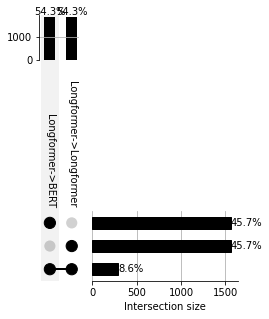


BERT -> ITD_BERT
Erro ao carregar... Recalculando...
Total de pares de vizinhos:  1855
Tamanho da interseção de vizinhos entre diferentes representações: 178
Média da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.9857717143015915
Desvio Padrão da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.009814606157843079


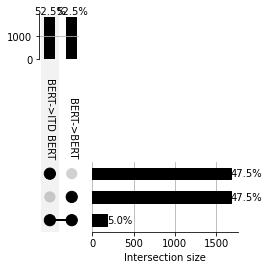


ITD_BERT -> BERT
Erro ao carregar... Recalculando...
Total de pares de vizinhos:  1855
Tamanho da interseção de vizinhos entre diferentes representações: 325
Média da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.9886951213616592
Desvio Padrão da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.008125454673869036


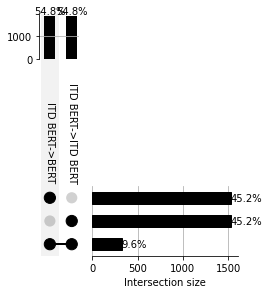


LONGFORMER -> ITD_LONGFORMER
Erro ao carregar... Recalculando...
Total de pares de vizinhos:  1855
Tamanho da interseção de vizinhos entre diferentes representações: 190
Média da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.9667006520848526
Desvio Padrão da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.011461711740328416


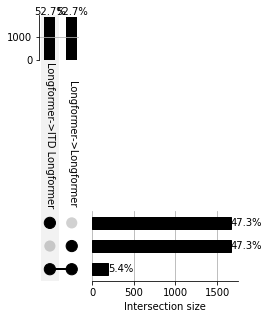


ITD_LONGFORMER -> LONGFORMER
Erro ao carregar... Recalculando...
Total de pares de vizinhos:  1855
Tamanho da interseção de vizinhos entre diferentes representações: 73
Média da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.99280651383204
Desvio Padrão da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.002891514269092571


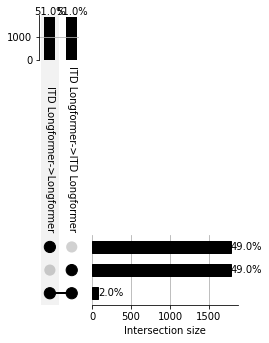

In [34]:
from_one_to_another_space_similarities_analysis(tcu_similarities, 'tcu')

### STJ Data

BERT -> LONGFORMER
Erro ao carregar... Recalculando...
Total de pares de vizinhos:  37015
Tamanho da interseção de vizinhos entre diferentes representações: 13045
Média da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.9792424195385747
Desvio Padrão da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.00968682270240712


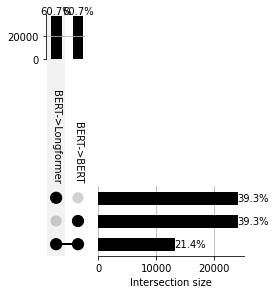


LONGFORMER -> BERT
Erro ao carregar... Recalculando...
Total de pares de vizinhos:  37015
Tamanho da interseção de vizinhos entre diferentes representações: 10052
Média da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.9786562787208053
Desvio Padrão da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.010596049726801492


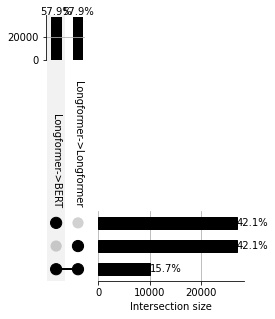


BERT -> ITD_BERT
Erro ao carregar... Recalculando...
Total de pares de vizinhos:  37015
Tamanho da interseção de vizinhos entre diferentes representações: 907
Média da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.980090700344582
Desvio Padrão da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.010563594212015144


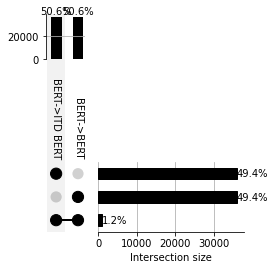


ITD_BERT -> BERT
Erro ao carregar... Recalculando...
Total de pares de vizinhos:  37015
Tamanho da interseção de vizinhos entre diferentes representações: 2715
Média da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.9725362921068462
Desvio Padrão da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.01791876311369154


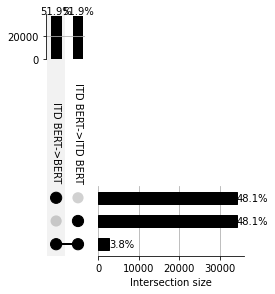


LONGFORMER -> ITD_LONGFORMER
Erro ao carregar... Recalculando...
Total de pares de vizinhos:  37015
Tamanho da interseção de vizinhos entre diferentes representações: 70
Média da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.9855937174388341
Desvio Padrão da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.01089717335535675


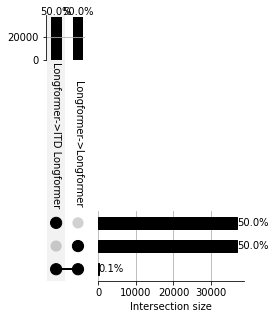


ITD_LONGFORMER -> LONGFORMER
Erro ao carregar... Recalculando...
Total de pares de vizinhos:  37015
Tamanho da interseção de vizinhos entre diferentes representações: 710
Média da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.9793125739399816
Desvio Padrão da Similaridade de Cosseno entre os pares de vizinhos da interseção:  0.012163132734403547


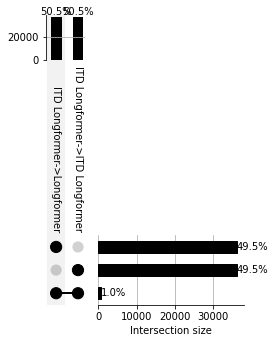

In [35]:
from_one_to_another_space_similarities_analysis(stj_similarities, 'stj')

In [36]:
# def from_one_to_another_space_similarities(source_ann, target_ann, nns_in_source):
#     to_another = []

#     for i in range(bert_ann.get_n_items()):
#         source_vector = source_ann.get_item_vector(i)
#         #se eu usar um sample posso acabar tendo vetores vazios em alguns espaços do index
#         result = len([elem for elem in vec if elem != 0])
#         if result != 0:
#             nns = target_ann.get_nns_by_vector(source_vector, 6, search_k=-1, include_distances=False)

#             for similar_index in nns[1:]:
#                 similar_vector = source_ann.get_item_vector(similar_index)
#                 similarity = cosine_similarity([source_vector], [similar_vector])[0][0]
#                 to_another.append([i, similar_index, similarity, 'BERT'])

#     to_another_df = pd.DataFrame(to_another, 
#                             columns=['SOURCE_INDEX','SIMILAR_INDEX','COSINE_SIMILARITY','MODEL_NAME'])
    
#     intersection = pd.merge(to_another_df, nns_in_source, how='inner', on=['SIMILAR_INDEX','SOURCE_INDEX'])
#     print('Total de pares de vizinhos: ', len(nns_in_source))
#     print('Tamanho da interseção de vizinhos entre diferentes representações:', len(intersection))
#     print('Média da Similaridade de Cosseno entre os pares de vizinhos da interseção: ', np.mean(intersection.COSINE_SIMILARITY_x))
#     print('Desvio Padrão da Similaridade de Cosseno entre os pares de vizinhos da interseção: ', np.std(intersection.COSINE_SIMILARITY_x))
    
#     pairs = []
#     spaces_comparision = {}
#     for i, pair in to_another_df.iterrows():
#         pairs.append((pair[0], pair[1]))
#     spaces_comparision['R1 -> R2'] = set(pairs)

#     pairs = []
#     for i, pair in nns_in_source.iterrows():
#         pairs.append((pair[0], pair[1]))
#     spaces_comparision['R1->R1'] = set(pairs)

#     example = from_contents(spaces_comparision)
#     plot(example, show_percentages=True,)
#     pyplot.show()
#     print()

In [37]:
# bert_ann = AnnoyIndex(3072, "angular")
# bert_ann.load("../results/faisstcu/bert.ann")

# itd_bert_ann = AnnoyIndex(3072, "angular")
# itd_bert_ann.load("../results/tcu/itd_bert.ann")

# long_ann = AnnoyIndex(3072, "angular")
# long_ann.load("../results/tcu/longformer.ann")

# itd_long_ann = AnnoyIndex(3072, "angular")
# itd_long_ann.load("../results/tcu/itd_longformer.ann")

# in_same_bert = similarities[similarities.MODEL_NAME == 'bert']
# in_same_itd_bert = similarities[similarities.MODEL_NAME == 'itd_bert']
# in_same_longformer = similarities[similarities.MODEL_NAME == 'longformer']
# in_same_itd_longformer = similarities[similarities.MODEL_NAME == 'itd_longformer']

# print('BERT -> LONGFORMER')
# from_one_to_another_space_similarities(bert_ann, long_ann, in_same_bert)

# print('LONGFORMER -> BERT')
# from_one_to_another_space_similarities(long_ann, bert_ann, in_same_longformer)

# print('BERT -> ITD_BERT')
# from_one_to_another_space_similarities(bert_ann, itd_bert_ann, in_same_bert)

# print('LONGFORMER -> ITD_LONGFORMER')
# from_one_to_another_space_similarities(long_ann, itd_long_ann, in_same_longformer)

# print('ITD_LONGFORMER -> LONGFORMER')
# from_one_to_another_space_similarities(itd_long_ann, long_ann, in_same_itd_longformer)

### Ponto 2:
- Calcular a distância de um mesmo documento D1 entre duas representações diferentes (D1' -> D1'')
- Recuperar o documento mais próximo do D1 em uma das representação (D2) e calcular a distância.
    - O que é mais próximo: o mesmo documento em representações diferentes ou o mais próximo do documento em uma representação fixada?
        - Verificar média das distâncias e mediana

In [38]:
from autorank import autorank, plot_stats, create_report, latex_table

def inner_and_outer_space_similarity(source_faiss, another_faiss):
    between_spaces_results = []
    for i , row in tcu_data.iterrows():
        source_vector = source_faiss.reconstruct(i)
        D, I = source_faiss.search(np.array([source_vector]).astype('float32'), 2)
        nns = I[0]
        source_nns_i = nns[-1]
        source_nns = source_faiss.reconstruct(int(source_nns_i))
        source_similarity = cosine_similarity([source_vector], [source_nns])[0][0]

        source_another_space_vector = another_faiss.reconstruct(i)
        source_another_space_similarity = cosine_similarity([source_vector], [source_another_space_vector])[0][0]

        between_spaces_results.append([i,source_nns_i,source_similarity,
                                       source_another_space_similarity])

    between_spaces_results_df = pd.DataFrame(between_spaces_results, 
                                columns=['SOURCE_INDEX','SOURCE_NNS_INDEX','SOURCE_NNS_SIMILARITY',
                                         'SOURCE_IN_ANOTHER_SPACE_SIMILARITY'])

    print('Média da Similaridade de Cosseno entre um documento e seu vizinho mais próximo numa mesma representação:\n', np.mean(between_spaces_results_df.SOURCE_NNS_SIMILARITY))
    print('Desvio Padrão da Similaridade de Cosseno entre um documento e seu vizinho mais próximo numa mesma representação:\n', np.std(between_spaces_results_df.SOURCE_NNS_SIMILARITY))
    print('Média da Similaridade de Cosseno entre duas representações distintas de um mesmo documento:\n', np.mean(between_spaces_results_df.SOURCE_IN_ANOTHER_SPACE_SIMILARITY))
    print('Desvio Padrão da Similaridade de Cosseno entre duas representações distintas de um mesmo documento:\n', np.std(between_spaces_results_df.SOURCE_IN_ANOTHER_SPACE_SIMILARITY))
    print('\n')
    to_test = pd.DataFrame()
    to_test['SOURCE'] = between_spaces_results_df.SOURCE_NNS_SIMILARITY
    to_test['ANOTHER_SPACE'] = between_spaces_results_df.SOURCE_IN_ANOTHER_SPACE_SIMILARITY
    autorank_result = autorank(to_test, alpha=0.05, verbose=False)
    create_report(autorank_result)
    plot_stats(autorank_result,allow_insignificant=True)
    plt.show()

### TCU Data

In [39]:
tcu_bert_faiss = faiss.read_index("../results/faiss/tcu/bert.faiss")
tcu_long_faiss = faiss.read_index("../results/faiss/tcu/longformer.faiss")
tcu_itd_bert_faiss = faiss.read_index("../results/faiss/tcu/itd_bert.faiss")

In [40]:
print('BERT -> LongFormer')
inner_and_outer_space_similarity(tcu_bert_faiss, tcu_long_faiss)

BERT -> LongFormer
Média da Similaridade de Cosseno entre um documento e seu vizinho mais próximo numa mesma representação:
 0.9884154854437733
Desvio Padrão da Similaridade de Cosseno entre um documento e seu vizinho mais próximo numa mesma representação:
 0.008096408765650192
Média da Similaridade de Cosseno entre duas representações distintas de um mesmo documento:
 0.9875148639203403
Desvio Padrão da Similaridade de Cosseno entre duas representações distintas de um mesmo documento:
 0.008074301602929507


The statistical analysis was conducted for 2 populations with 371 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations SOURCE (p=0.000) and ANOTHER_SPACE (p=0.000). Therefore, we assume that not all populations are normal.
No check for homogeneity was required because we only have two populations.
Because we have only two populations and both of them are not normal, we use 

/opt/conda/lib/python3.7/site-packages/autorank/autorank.py:331: UserWarning: No plot to visualize statistics for Wilcoxon test available. Doing nothing.
  warnings.warn('No plot to visualize statistics for Wilcoxon test available. Doing nothing.')


Tomando como origem o espaço vetorial do BERT e como comparativo o LONGFORMER, o resultado acima sugere que do ponto de vista estatístico a similaridade entre diferentes representações de um mesmo documento é maior que a similaridade entre o documento e seu vizinho mais próximo na mesma representação de forma significante.

In [41]:
print('BERT -> ITD_BERT')
inner_and_outer_space_similarity(tcu_bert_faiss, tcu_itd_bert_faiss)

BERT -> ITD_BERT
Média da Similaridade de Cosseno entre um documento e seu vizinho mais próximo numa mesma representação:
 0.9884154854437733
Desvio Padrão da Similaridade de Cosseno entre um documento e seu vizinho mais próximo numa mesma representação:
 0.008096408765650192
Média da Similaridade de Cosseno entre duas representações distintas de um mesmo documento:
 0.8967180801530411
Desvio Padrão da Similaridade de Cosseno entre duas representações distintas de um mesmo documento:
 0.0068204944435844425


The statistical analysis was conducted for 2 populations with 371 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations SOURCE (p=0.000) and ANOTHER_SPACE (p=0.000). Therefore, we assume that not all populations are normal.
No check for homogeneity was required because we only have two populations.
Because we have only two populations and both of them are not normal, we use W

/opt/conda/lib/python3.7/site-packages/autorank/autorank.py:331: UserWarning: No plot to visualize statistics for Wilcoxon test available. Doing nothing.
  warnings.warn('No plot to visualize statistics for Wilcoxon test available. Doing nothing.')


Comentário semelhante ao anterior vale para esse exemplo.

### STJ Data

In [42]:
stj_bert_faiss = faiss.read_index("../results/faiss/stj/bert.faiss")
stj_long_faiss = faiss.read_index("../results/faiss/stj/longformer.faiss")
stj_itd_bert_faiss = faiss.read_index("../results/faiss/stj/itd_bert.faiss")

In [43]:
print('BERT -> LongFormer')
inner_and_outer_space_similarity(stj_bert_faiss, stj_long_faiss)

BERT -> LongFormer
Média da Similaridade de Cosseno entre um documento e seu vizinho mais próximo numa mesma representação:
 0.9776339563076708
Desvio Padrão da Similaridade de Cosseno entre um documento e seu vizinho mais próximo numa mesma representação:
 0.010692197546737397
Média da Similaridade de Cosseno entre duas representações distintas de um mesmo documento:
 0.9874308000035041
Desvio Padrão da Similaridade de Cosseno entre duas representações distintas de um mesmo documento:
 0.01144032981727029


The statistical analysis was conducted for 2 populations with 371 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations ANOTHER_SPACE (p=0.000) and SOURCE (p=0.000). Therefore, we assume that not all populations are normal.
No check for homogeneity was required because we only have two populations.
Because we have only two populations and both of them are not normal, we use W

/opt/conda/lib/python3.7/site-packages/autorank/autorank.py:331: UserWarning: No plot to visualize statistics for Wilcoxon test available. Doing nothing.
  warnings.warn('No plot to visualize statistics for Wilcoxon test available. Doing nothing.')


In [44]:
print('BERT -> ITD_BERT')
inner_and_outer_space_similarity(stj_bert_faiss, stj_itd_bert_faiss)

BERT -> ITD_BERT
Média da Similaridade de Cosseno entre um documento e seu vizinho mais próximo numa mesma representação:
 0.9776339563076708
Desvio Padrão da Similaridade de Cosseno entre um documento e seu vizinho mais próximo numa mesma representação:
 0.010692197546737397
Média da Similaridade de Cosseno entre duas representações distintas de um mesmo documento:
 0.8915418188848264
Desvio Padrão da Similaridade de Cosseno entre duas representações distintas de um mesmo documento:
 0.014336288292596052


The statistical analysis was conducted for 2 populations with 371 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations SOURCE (p=0.000) and ANOTHER_SPACE (p=0.004). Therefore, we assume that not all populations are normal.
No check for homogeneity was required because we only have two populations.
Because we have only two populations and both of them are not normal, we use Wi

/opt/conda/lib/python3.7/site-packages/autorank/autorank.py:331: UserWarning: No plot to visualize statistics for Wilcoxon test available. Doing nothing.
  warnings.warn('No plot to visualize statistics for Wilcoxon test available. Doing nothing.')


# TODO Reunião 10/03

- <s>Calcular os mais similares de cada documento numa representação para documentos de outra representação (p.ex.: BERT -> Longformer) e analisar com o conjunto de similares calculados dentro de uma mesma representação.</s>
    - <s>Verificar médias e desvio padrão</s>

- <s>Calcular a distância de um mesmo documento D1 entre duas representações diferentes (D1' -> D1'')</s>
    - <s>Recuperar o documento mais próximo do D1 em uma das representação (D2) e calcular a distância.</s>
    - <s>O que é mais próximo: o mesmo documento em representações diferentes ou o mais próximo do </s>documento em uma representação fixada?</s>
    - <s>Verificar média das distâncias e desvio padrão</s>

- <s>Colorir os pontos em cada representação de acordo com a jurisprudência associada</s>
    - <s>Os pontos agrupados são de uma mesma jurisprudência?</s>

- <s>Consigo verificar se os grupos de diferentes representações são compostos dos mesmos documentos?</s>

- <s>Existe alguma ferramenta que auxilie essa visualização de forma interativa?</s>
    
- Quantidade de tokens por documento segundo cada forma de tokenização
 

# Questões a serem respondidas

- O tamanho do contexto importa? Longformer >> BERT?
- Há uma grande diferença no cálculo de similaridade entre diferentes arquiteturas? BERT != ELMo
- A Language Model base importa muito? BERT (BERTimbau) != Sentence Transformer (Distill USE Multilingual)
- Como se diferem entre si as abordagens frequentistas, agrupamento de vetores e contextualizas (com trasformer ou não)
- _Aline: "Daniel, uma coisa que esqueci de perguntar ontem: quando o tamanho do seu documento é maior que a entrada do modelo (no caso dos transformers, em particular), o que você faz? Fiquei me perguntando se esses seriam os mais representativos do documento."_
    - _Daniel: "Aí isso depende do foco de um analista. Por exemplo, na maior parte desse documentos, o começo é um resumo de tudo que envolve o processo, do meio pro fim acaba sendo o julgamento em si. Numa visão mais ampla, o resumo é mais útil pra similaridade. Mas a similaridade num grão mais fino se valeria melhor do restante do documento. Seria como usar o começo dos textos fosse um filtro grosseiro, e o resto do documento um filtro bem específico."_